In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"

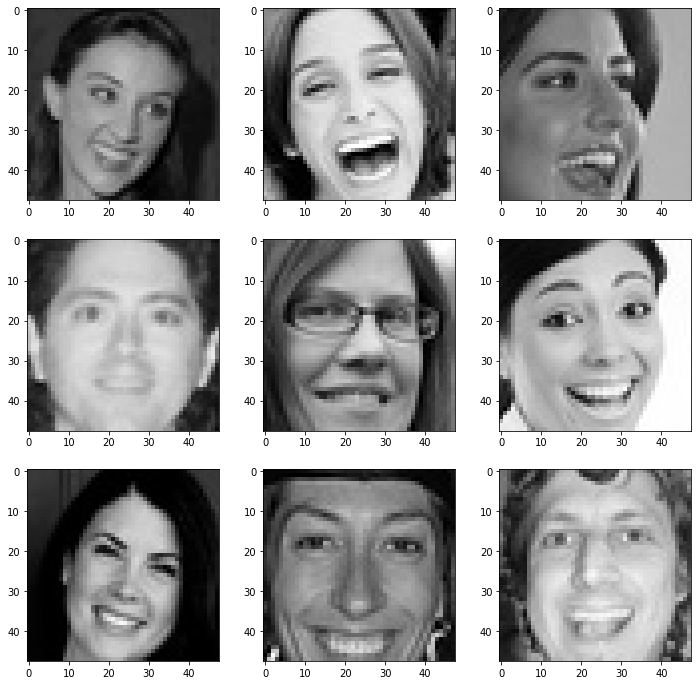

In [3]:
expression = "happy"
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = load_img(folder_path + "train/" + expression + "/" + os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [4]:
batch_size = 128

datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:
no_of_classes = 7
model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.25))
#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.25))
#3rd CNN layer
model.add(Conv2D(512,(5,5),padding = 'same'))
# model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Dropout(0.25))


model.add(Flatten())

#fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#fully connected 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
#final output layer
model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy', metrics=
             ['accuracy'])
model.summary()

2022-12-23 22:08:41.038375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 22:08:41.162307: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 22:08:41.163445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 22:08:41.165614: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath = '/kaggle/working/CNN.h5',
                             monitor="accuracy",
                             verbose=1,
                             save_best_only=True,
                             mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=4,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=4,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=["accuracy"])

In [7]:
history = model.fit(x=train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data = test_set,
                    validation_steps = test_set.n//test_set.batch_size,
                    callbacks=callbacks_list
                    )

2022-12-23 22:08:44.898492: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-23 22:08:47.593686: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


225/225 [==============================] - 222s 951ms/step - loss: 2.0026 - accuracy: 0.2069 - val_loss: 1.8980 - val_accuracy: 0.1810

Epoch 00001: accuracy improved from -inf to 0.20695, saving model to /kaggle/working/CNN.h5
Epoch 2/100
225/225 [==============================] - 29s 127ms/step - loss: 1.8351 - accuracy: 0.2390 - val_loss: 1.9060 - val_accuracy: 0.2469

Epoch 00002: accuracy improved from 0.20695 to 0.23905, saving model to /kaggle/working/CNN.h5
Epoch 3/100
225/225 [==============================] - 28s 125ms/step - loss: 1.6333 - accuracy: 0.3538 - val_loss: 1.7235 - val_accuracy: 0.3682

Epoch 00003: accuracy improved from 0.23905 to 0.35378, saving model to /kaggle/working/CNN.h5
Epoch 4/100
225/225 [==============================] - 28s 127ms/step - loss: 1.4948 - accuracy: 0.4177 - val_loss: 1.3753 - val_accuracy: 0.4726

Epoch 00004: accuracy improved from 0.35378 to 0.41770, saving model to /kaggle/working/CNN.h5
Epoch 5/100
225/225 [=========================

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
num_of_test_samples = 7066 
Y_pred = model.predict(test_set, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)
print('Classification Report')
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 477   20   47   60  176  145   35]
 [  27   48    7    7    9    9    4]
 [ 144   10  278   55  172  228  131]
 [  59    6   35 1459  125   96   45]
 [ 108    2   37  112  746  184   27]
 [ 136   12   66   71  255  579   20]
 [  18    1   60   43   42   20  613]]
Classification Report
              precision    recall  f1-score   support

       angry       0.49      0.50      0.49       960
     disgust       0.48      0.43      0.46       111
        fear       0.52      0.27      0.36      1018
       happy       0.81      0.80      0.80      1825
     neutral       0.49      0.61      0.54      1216
         sad       0.46      0.51      0.48      1139
    surprise       0.70      0.77      0.73       797

    accuracy                           0.59      7066
   macro avg       0.57      0.56      0.55      7066
weighted avg       0.60      0.59      0.59      7066



Text(69.0, 0.5, 'Truth')

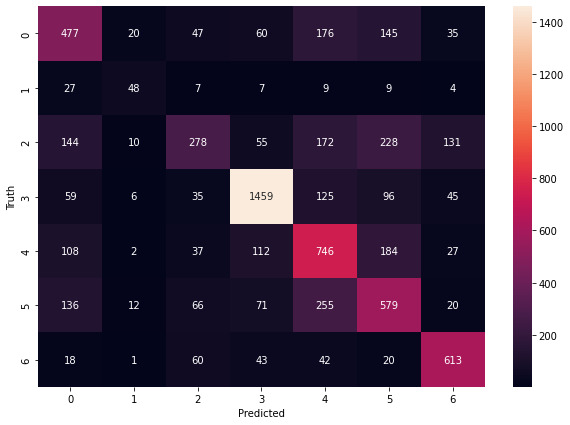

In [9]:
import seaborn as sn


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

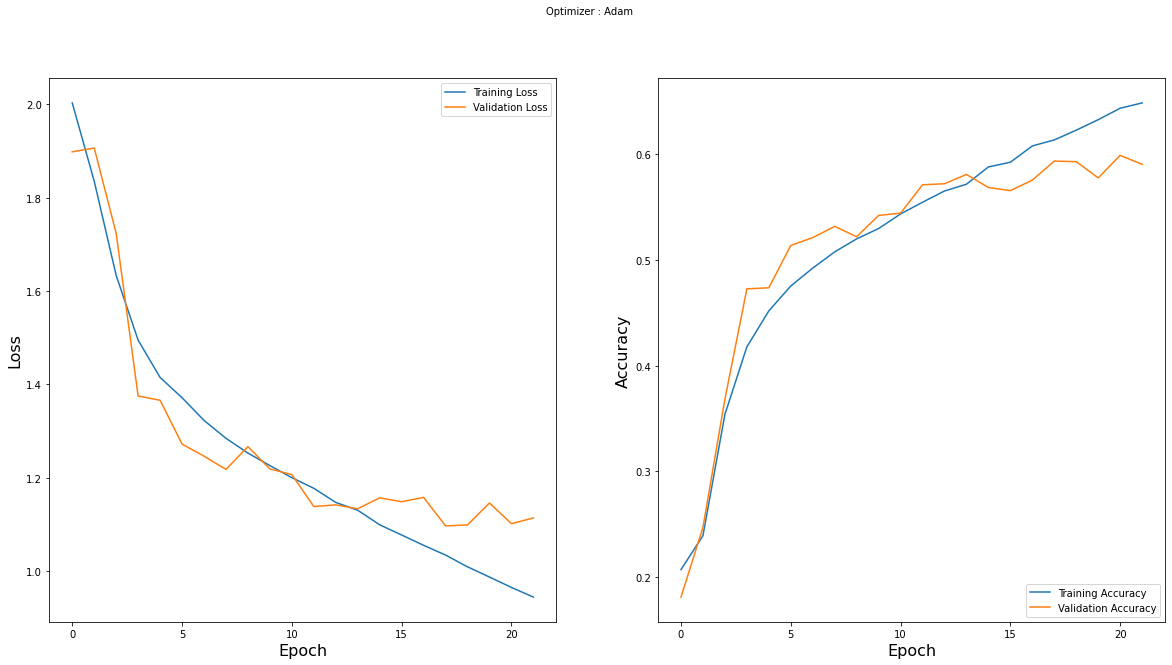

In [10]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
model.evaluate(test_set)

56/56 [==============================] - 6s 98ms/step - loss: 1.0959 - accuracy: 0.5944


[1.0959280729293823, 0.5943956971168518]

In [12]:
print(2)

2
